In [ ]:
%pip install google-api-python-client google-generativeai -qU  # For Gemini Pro 1.5
%pip install matplotlib # for helper functions

In [44]:
import googleapiclient
from googleapiclient.http import MediaFileUpload
import mimetypes

In [45]:
# Helper function to format and print outputs
import textwrap
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

def display_img(path):
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()


In [46]:
API_KEY ='YOUR_API_KEY'
GEMINI_API_URL = f"https://generativelanguage.googleapis.com/$discovery/rest?version=v1beta&key={API_KEY}"

In [47]:
!wget `lynx --dump http://xkcd.com/|grep png` -O comic.png


[31]https://imgs.xkcd.com/comics/greenland_size.png: Scheme missing.
--2024-03-27 04:41:52--  http://31./
Resolving 31. (31.)... failed: Name or service not known.
wget: unable to resolve host address ‘31.’
--2024-03-27 04:41:52--  https://imgs.xkcd.com/comics/greenland_size.png
Resolving imgs.xkcd.com (imgs.xkcd.com)... 146.75.92.67, 2a04:4e42:87::67
Connecting to imgs.xkcd.com (imgs.xkcd.com)|146.75.92.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35210 (34K) [image/png]
Saving to: ‘comic.png’

comic.png           100%[===================>]  34.38K  --.-KB/s    in 0.003s  

2024-03-27 04:41:52 (10.1 MB/s) - ‘comic.png’ saved [35210/35210]

FINISHED --2024-03-27 04:41:52--
Total wall clock time: 0.2s
Downloaded: 1 files, 34K in 0.003s (10.1 MB/s)


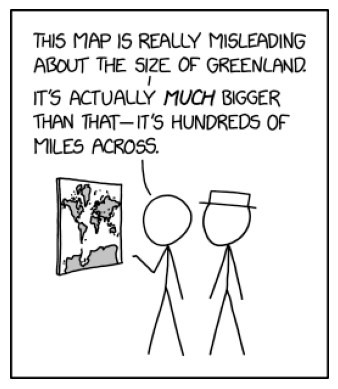

In [48]:
display_img("comic.png")

In [49]:
# Initialize Google API Client
genai_docs = requests.get(GEMINI_API_URL)
genai_api = googleapiclient.discovery.build_from_document(genai_docs.content, developerKey=api_key)

In [50]:
# Prepare file to upload to GenAI File API
file_path = "comic.png"
media = MediaFileUpload(file_path, mimetype=mimetypes.guess_type(file_path)[0])
body = {"file": {"displayName": "Gemini logo"}}

In [51]:
# Upload file
response = genai_api.media().upload(media_body=media, body=body).execute()
file_uri, file_mimetype = response["file"]["uri"], response["file"]["mimeType"]
print(file_uri)

https://generativelanguage.googleapis.com/v1beta/files/le2ql78i9imf


In [52]:
prompt = """Explain this XKCD comic in detail in markdown format:
Please provide the following information:
Comic URL or a description of the comic: This will allow me to identify the specific comic you want me to analyze.
Specific aspects you want me to focus on: Do you want me to explain the overall message, analyze specific panels, or interpret the humor?
Additionally, consider including:
Your own interpretation of the comic: This can help me understand your perspective and tailor my explanation accordingly.
Any relevant background information: This could include references to pop culture, scientific concepts, or current events that are relevant to understanding the comic.
By providing this information, I can create a comprehensive and informative explanation of the XKCD comic in markdown format."""

In [53]:
model = "models/gemini-1.5-pro-latest"
contents = {
    "contents": [
        {
            "parts": [
                {"text": prompt},
                {"file_data": {"file_uri": file_uri, "mime_type": file_mimetype}}
            ]
        }
    ]
}

In [56]:
response = genai_api.models().generateContent(model=model, body=contents).execute()
candidate_content = response['candidates'][0]['content']
text_part = candidate_content['parts'][0]['text']
to_markdown(text_part)

> The XKCD comic you provided shows two stick figures looking at a map of the world. One of the figures is pointing to Greenland and saying that the map is misleading because Greenland is actually much bigger than it appears on the map. The other figure is listening intently.
> 
> The humor in the comic comes from the fact that Greenland is actually much smaller than it appears on most maps. This is because of the Mercator projection, which is a way of representing the Earth on a flat surface. The Mercator projection distorts the size of landmasses, especially those that are located near the poles. As a result, Greenland appears to be much larger than it actually is.
> 
> The comic is a clever way of pointing out the limitations of maps. Maps are useful tools, but they can also be misleading if we don't understand how they are made.
